In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
import matplotlib.pyplot as plt

In [9]:
mnist.train.images.shape

(55000, 784)

In [10]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
singleimg=mnist.train.images[1].reshape(28,28)

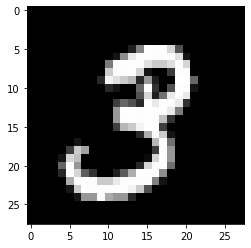

In [12]:
plt.imshow(singleimg,cmap='gist_gray')

# y=mx+b

In [13]:
x=tf.placeholder(tf.float32,shape=[None,784])

In [14]:
w=tf.Variable(tf.zeros([784,10]))

In [15]:
b=tf.Variable(tf.zeros([10]))

In [16]:
y=tf.matmul(x,w)+b

In [17]:
ytrue=tf.placeholder(tf.float32,shape=[None,10])

In [20]:
#Loss Function
crossentropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ytrue,logits=y))

In [22]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [24]:
train=optimizer.minimize(crossentropy)

In [25]:
init=tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batchx,batchy=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batchx,ytrue:batchy})
    correctpred=tf.equal(tf.argmax(y,1),tf.argmax(ytrue,1))
    acc=tf.reduce_mean(tf.cast(correctpred,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,ytrue:mnist.test.labels}))

0.9168
